In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('personal_finance_employees_V1.csv')
print(df)

       Employee  Monthly Income (£)  Electricity Bill (£)  Gas Bill (£)  \
0    Employee_1             4999.39                120.00         80.00   
1    Employee_2             4660.24                120.00         80.00   
2    Employee_3             1942.89                124.68         98.13   
3    Employee_4             3565.80                120.00         80.00   
4    Employee_5             5121.99                120.00         80.00   
5    Employee_6             4182.71                120.00         80.00   
6    Employee_7             5924.83                120.00         80.00   
7    Employee_8             3714.05                120.00         80.00   
8    Employee_9             3096.13                120.00         80.00   
9   Employee_10             3330.21                120.00         80.00   
10  Employee_11             2403.29                120.00         80.00   
11  Employee_12             1270.58                112.43         78.42   
12  Employee_13          

round everything to 2 decimal points

add date to data

In [72]:
df['Date'] = '2024-12-1'
print(df)

       Employee  Monthly Income (£)  Electricity Bill (£)  Gas Bill (£)  \
0    Employee_1             4999.39                120.00         80.00   
1    Employee_2             4660.24                120.00         80.00   
2    Employee_3             1942.89                124.68         98.13   
3    Employee_4             3565.80                120.00         80.00   
4    Employee_5             5121.99                120.00         80.00   
5    Employee_6             4182.71                120.00         80.00   
6    Employee_7             5924.83                120.00         80.00   
7    Employee_8             3714.05                120.00         80.00   
8    Employee_9             3096.13                120.00         80.00   
9   Employee_10             3330.21                120.00         80.00   
10  Employee_11             2403.29                120.00         80.00   
11  Employee_12             1270.58                112.43         78.42   
12  Employee_13          

In [73]:
df = df.round(2)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df.fillna(0, inplace=True)
df.to_csv('personal_finance_employees_V1.csv', index=False)
df = pd.read_csv('personal_finance_employees_V1.csv')
print(df)

       Employee  Monthly Income (£)  Electricity Bill (£)  Gas Bill (£)  \
0    Employee_1             4999.39                120.00         80.00   
1    Employee_2             4660.24                120.00         80.00   
2    Employee_3             1942.89                124.68         98.13   
3    Employee_4             3565.80                120.00         80.00   
4    Employee_5             5121.99                120.00         80.00   
5    Employee_6             4182.71                120.00         80.00   
6    Employee_7             5924.83                120.00         80.00   
7    Employee_8             3714.05                120.00         80.00   
8    Employee_9             3096.13                120.00         80.00   
9   Employee_10             3330.21                120.00         80.00   
10  Employee_11             2403.29                120.00         80.00   
11  Employee_12             1270.58                112.43         78.42   
12  Employee_13          

 Categories: Income, bills, entertainment, transport, savings

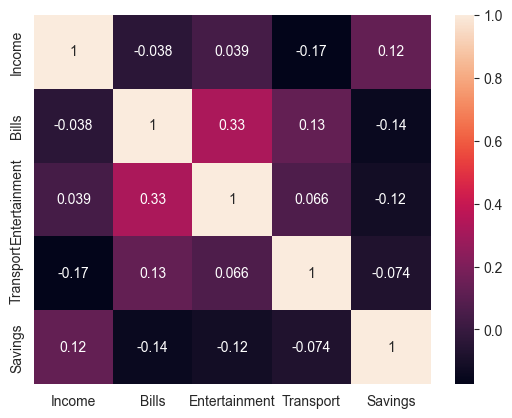

In [74]:
df_corrdata = {
    'Income': df['Monthly Income (£)'],
    'Bills': df['Electricity Bill (£)'] + df['Gas Bill (£)'] + df['Water Bill (£)'],
    'Entertainment': df['Amazon Prime (£)'] + df['Netflix (£)'] + df['Sky Sports (£)'],
    'Transport': df['Transportation (£)'],
    'Savings': df['Savings for Property (£)']
}
df_corrdata = pd.DataFrame(df_corrdata)
df_corrdata.fillna(0, inplace=True)
corrMatrix = df_corrdata.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


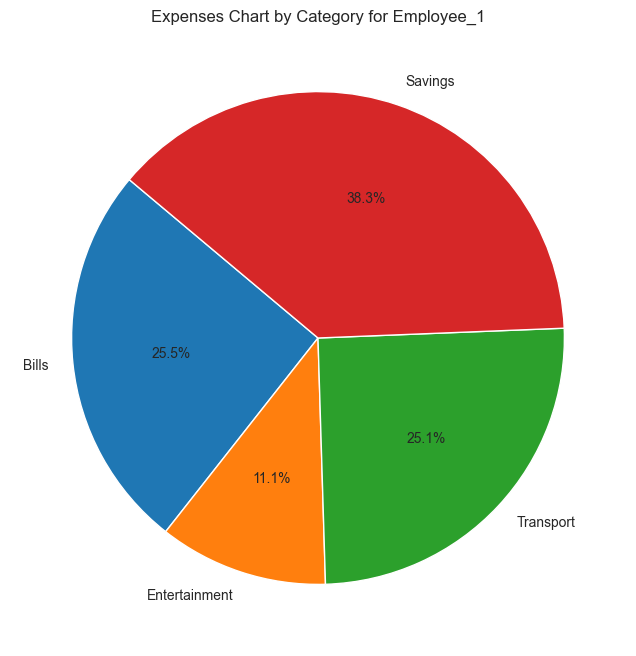

In [75]:

df_corrdata = {
    'Employee' : df['Employee'],
    'Bills': df['Electricity Bill (£)'] + df['Gas Bill (£)'] + df['Water Bill (£)'],
    'Entertainment': df['Amazon Prime (£)'] + df['Netflix (£)'] + df['Sky Sports (£)'],
    'Transport': df['Transportation (£)'],
    'Savings': df['Savings for Property (£)']
}
df_corrdata = pd.DataFrame(df_corrdata)

# Filter for Employee_1
subframe = df_corrdata[df_corrdata['Employee'] == 'Employee_2']

subframe = subframe.drop(columns=['Employee'])

# Prepare data for the pie chart
expenses = subframe.iloc[0]  # Select the first (and only) row of the subframe
labels = expenses.index
sizes = expenses.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, startangle=140, autopct='%1.1f%%')

# Adding a title
plt.title('Expenses Chart by Category for Employee_1')

# Display the pie chart
plt.show()


<Axes: >

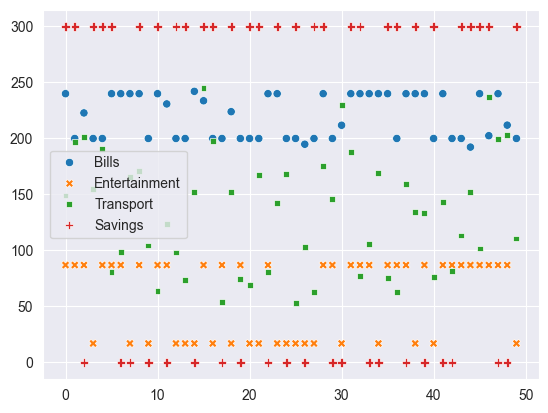

In [76]:

sns.scatterplot(data = df_corrdata)